In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8E7A-0D55

 Directory of C:\Users\zics\Desktop\py\dphi

05/23/2022  06:47 PM    <DIR>          .
05/23/2022  06:47 PM    <DIR>          ..
05/23/2022  06:47 PM    <DIR>          .ipynb_checkpoints
05/16/2022  11:22 PM           615,767 dphi.ipynb
05/22/2022  11:05 PM            66,369 test_dataset.csv
05/22/2022  11:05 PM           160,267 train_dataset.csv
               3 File(s)        842,403 bytes
               3 Dir(s)  48,206,548,992 bytes free


In [147]:
df=pd.read_csv('train_dataset.csv')
df2=pd.read_csv('test_dataset.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,133.0,0.003,0.000,0.004,0.004,0.0,0.000,30.0,1.5,0.0,...,67.0,169.0,9.0,1.0,147.0,137.0,144.0,40.0,1.0,1.0
1,130.0,0.001,0.001,0.012,0.010,0.0,0.001,62.0,2.2,0.0,...,50.0,211.0,9.0,0.0,60.0,89.0,113.0,250.0,0.0,3.0
2,141.0,0.000,0.008,0.000,0.000,0.0,0.000,75.0,0.3,49.0,...,136.0,145.0,1.0,0.0,143.0,141.0,143.0,0.0,1.0,2.0
3,144.0,0.000,0.002,0.002,0.000,0.0,0.000,84.0,0.3,34.0,...,132.0,170.0,2.0,0.0,144.0,143.0,145.0,0.0,-1.0,3.0
4,106.0,0.001,0.000,0.011,0.000,0.0,0.000,63.0,0.6,0.0,...,95.0,125.0,1.0,0.0,112.0,110.0,112.0,1.0,0.0,1.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1488 non-null   float64
 1   accelerations                                           1488 non-null   float64
 2   fetal_movement                                          1488 non-null   float64
 3   uterine_contractions                                    1488 non-null   float64
 4   light_decelerations                                     1488 non-null   float64
 5   severe_decelerations                                    1488 non-null   float64
 6   prolongued_decelerations                                1488 non-null   float64
 7   abnormal_short_term_variability                         1488 non-null   float64
 8   mean_value_of_short_term_variability  

In [149]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,...,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.00000,1488.000000,1488.000000,1488.000000,1488.000000
mean,133.100806,0.003222,0.009307,0.004360,0.001916,0.000002,0.000169,46.719758,1.343011,9.470430,...,93.061156,164.114247,4.061156,0.336022,137.337366,134.44422,137.972446,19.331989,0.325269,1.304435
std,10.037418,0.003876,0.044165,0.002972,0.002961,0.000045,0.000623,17.325868,0.890912,18.030735,...,29.458569,18.373700,2.967594,0.753378,16.530802,15.67541,14.589470,29.838886,0.612891,0.614272
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,76.00000,77.000000,0.000000,-1.000000,1.000000
25%,125.750000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,127.750000,124.00000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,163.000000,3.000000,0.000000,139.000000,136.00000,139.000000,8.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,10.000000,...,119.000000,175.000000,6.000000,0.000000,148.000000,145.00000,148.000000,25.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,158.000000,238.000000,18.000000,10.000000,187.000000,182.00000,186.000000,269.000000,1.000000,3.000000


In [150]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1488
Columns  :  22

Features : 
 ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']

Missing values :   0

Unique values :  
 baseline value                                             48
accelerations                                              20
fetal_movement                                             83
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                             

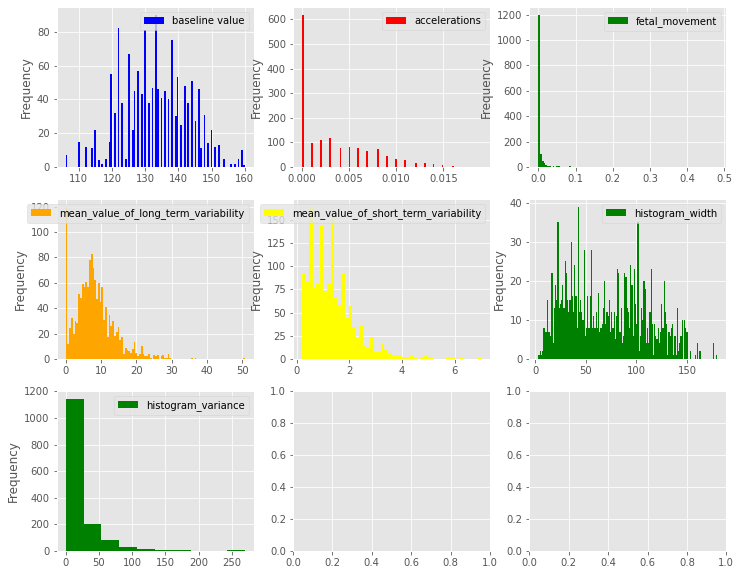

In [151]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
df.plot(kind="hist", y="baseline value", bins=100, color="b", ax=axes[0][0])
df.plot(kind="hist", y="accelerations", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="fetal_movement", bins=100, color="g", ax=axes[0][2])
df.plot(kind="hist", y="mean_value_of_long_term_variability", bins=100, color="orange", ax=axes[1][0])
df.plot(kind="hist", y="mean_value_of_short_term_variability", bins=50, color="yellow", ax=axes[1][1])
df.plot(kind="hist", y="histogram_width", bins=150, color="g", ax=axes[1][2])
df.plot(kind="hist", y="histogram_variance", bins=10, color="g", ax=axes[2][0])
plt.show()

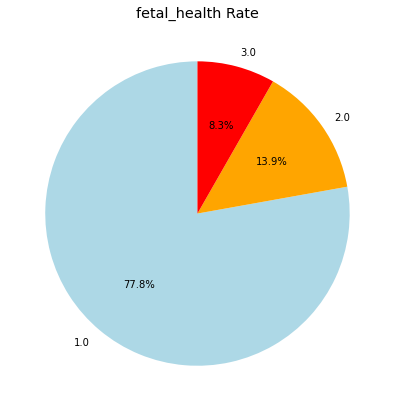

In [152]:

labels =df['fetal_health'].value_counts(sort = True).index
sizes = df['fetal_health'].value_counts(sort = True)

colors = ["lightblue","orange","red"]
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

plt.title('fetal_health Rate')
plt.show()

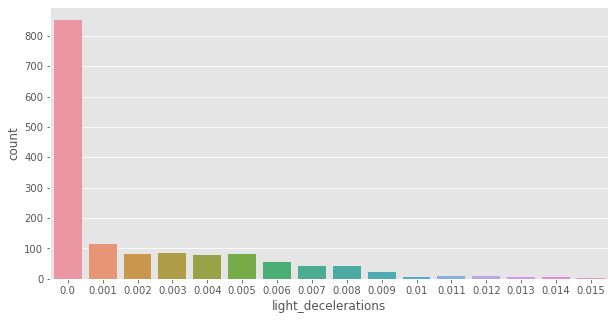

In [153]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='light_decelerations');


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Correlation</h1>


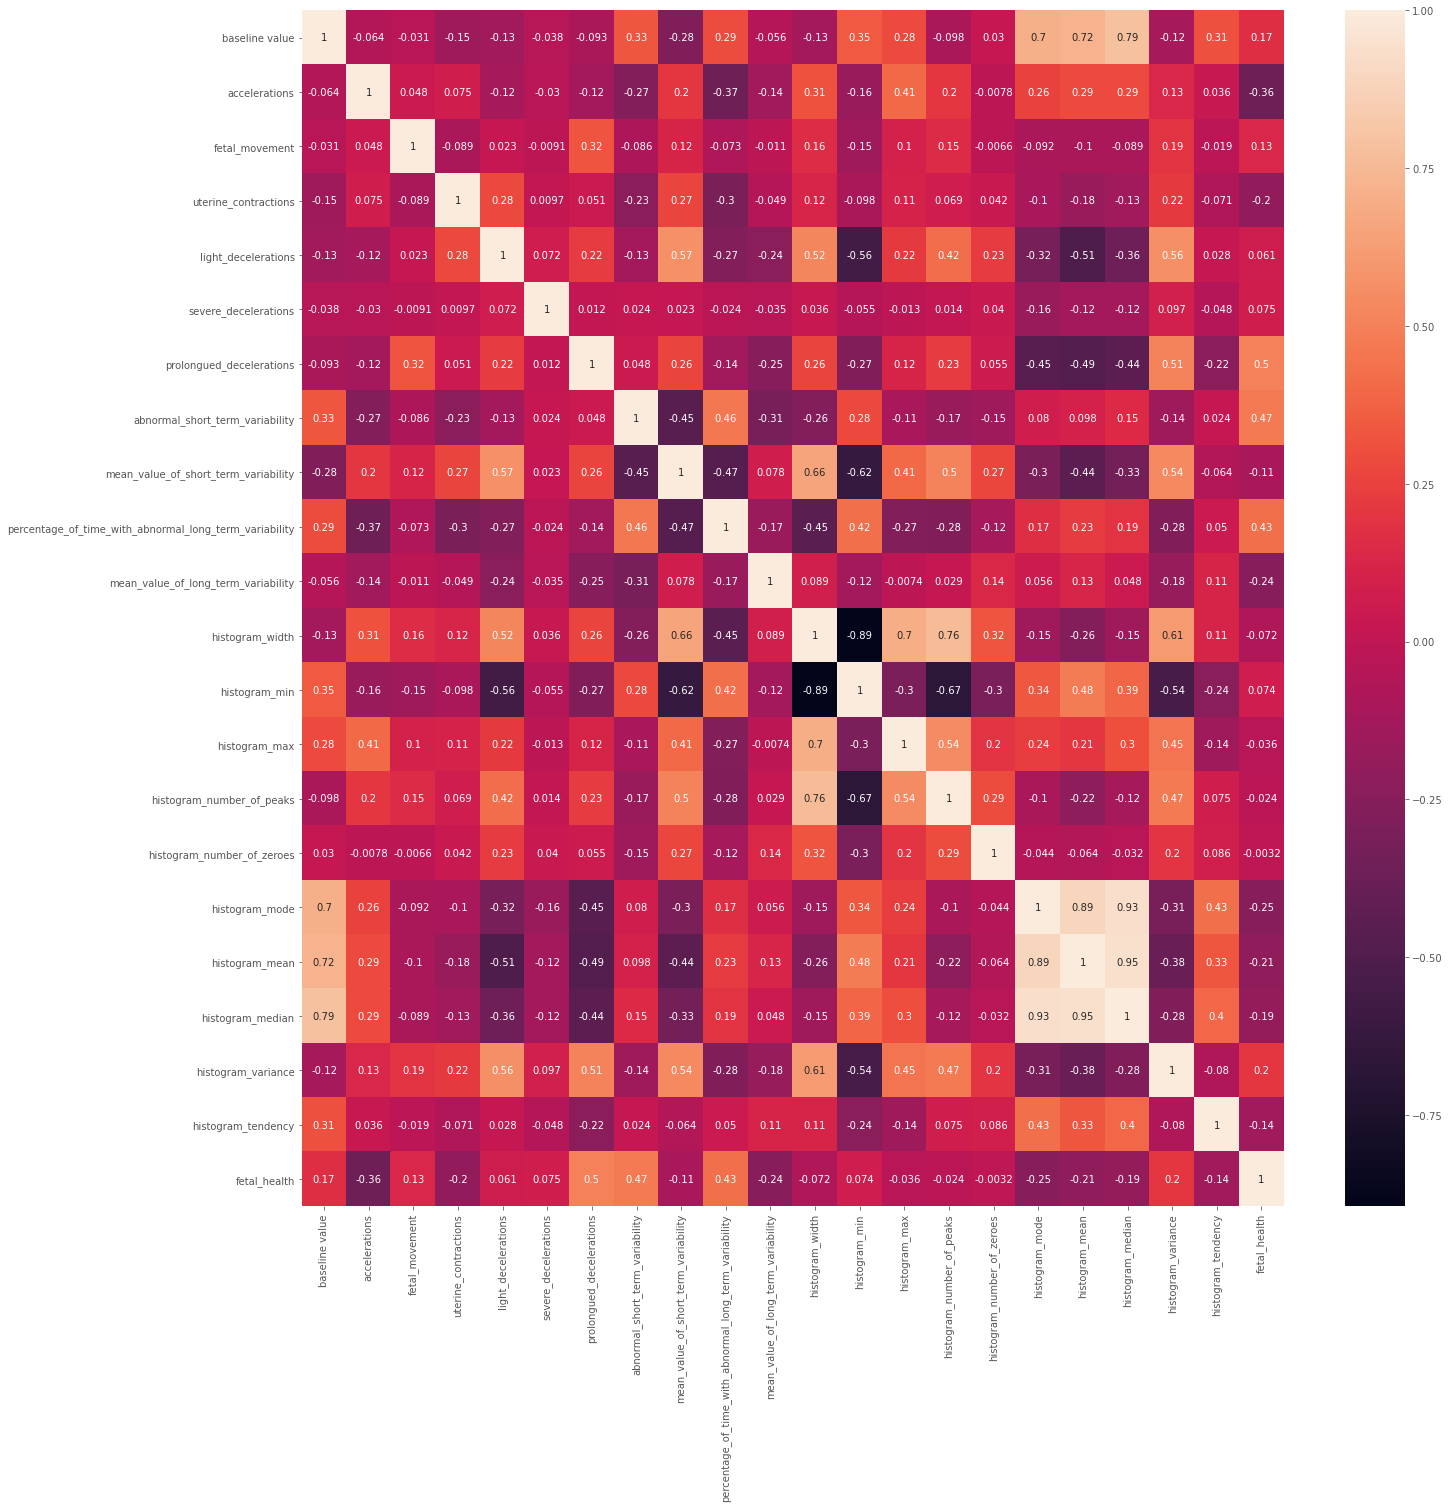

In [154]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot=True);

In [155]:
X = df.drop(['fetal_health'], axis=1) 
Y = df['fetal_health']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


((1041, 21), (447, 21))

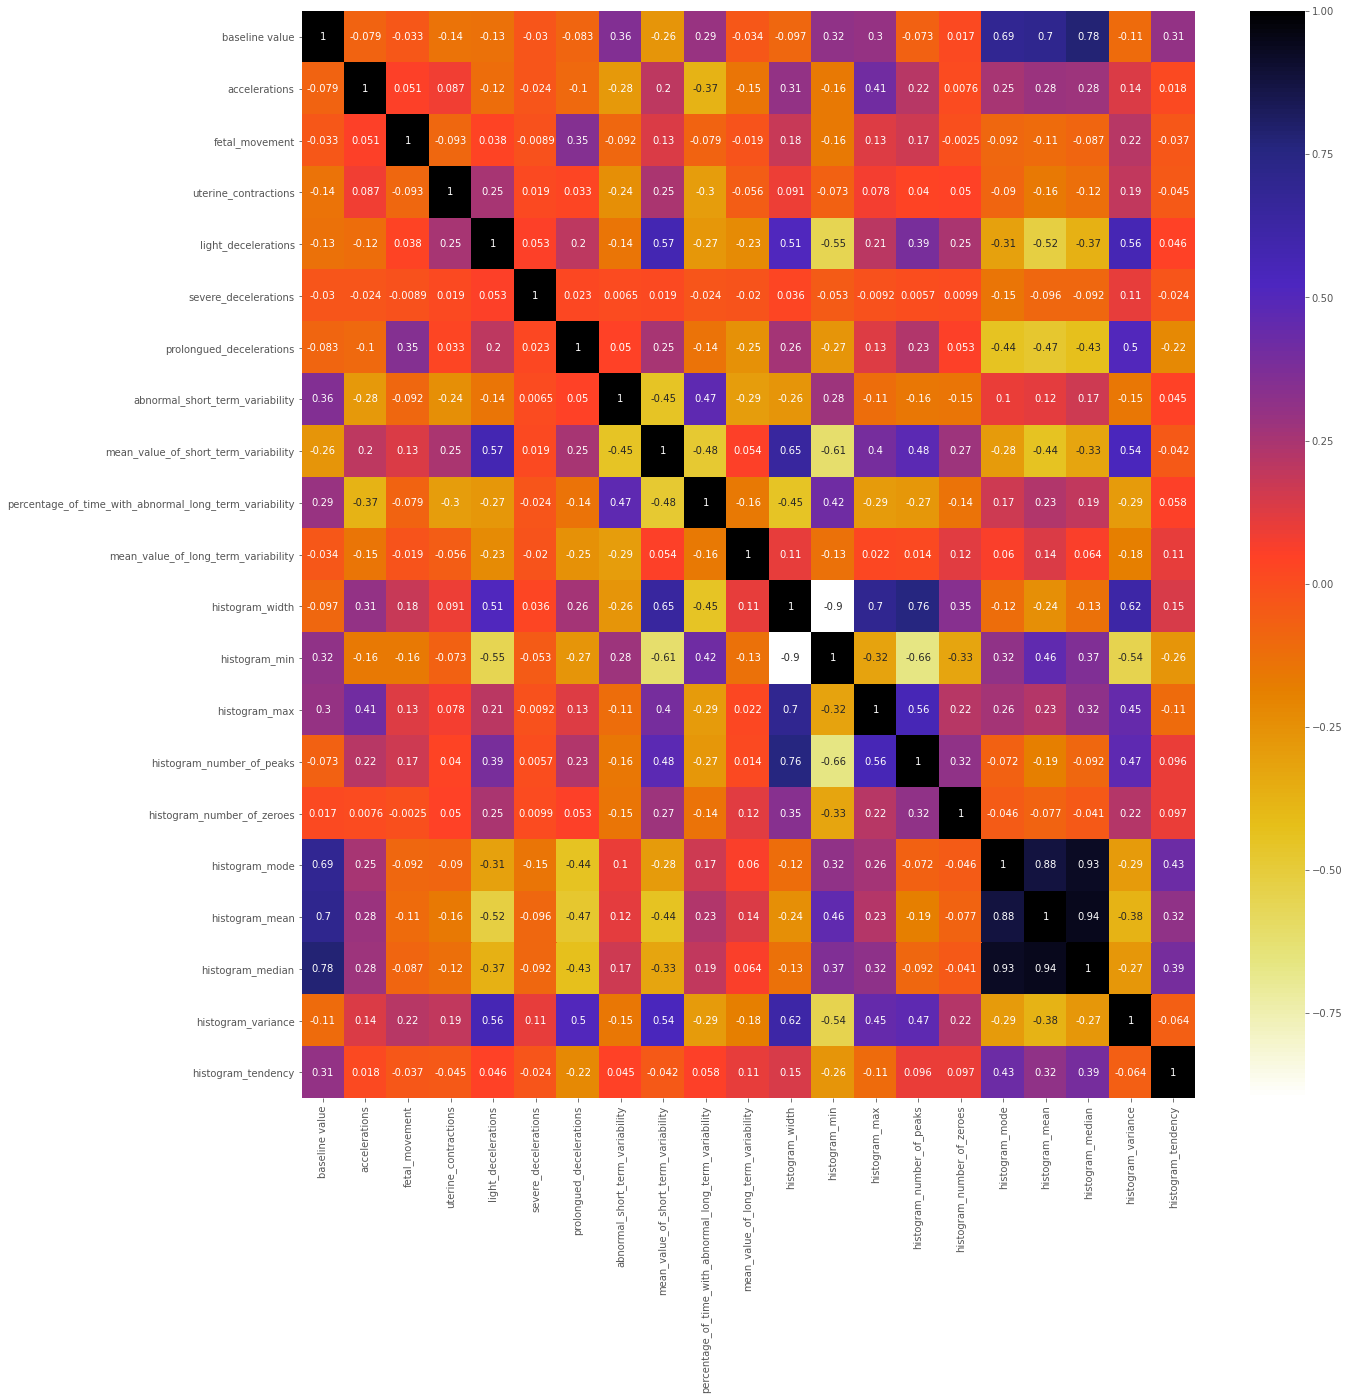

In [157]:
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [324]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [206]:
corr_features = correlation(X_train, 0.9)
corr_features

{'histogram_median'}

In [207]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency
9,125.0,0.000,0.000,0.006,0.006,0.0,0.001,65.0,1.3,0.0,3.0,77.0,78.0,155.0,4.0,0.0,110.0,111.0,8.0,0.0
353,125.0,0.000,0.000,0.008,0.009,0.0,0.000,62.0,1.3,0.0,1.3,70.0,68.0,138.0,6.0,0.0,128.0,117.0,25.0,1.0
920,133.0,0.000,0.000,0.008,0.000,0.0,0.000,41.0,1.0,5.0,28.9,73.0,84.0,157.0,8.0,2.0,140.0,136.0,8.0,1.0
473,131.0,0.004,0.000,0.005,0.007,0.0,0.001,33.0,1.9,0.0,2.4,127.0,51.0,178.0,7.0,0.0,142.0,126.0,90.0,1.0
960,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,133.0,0.001,0.000,0.009,0.004,0.0,0.004,63.0,2.1,0.0,0.0,133.0,52.0,185.0,4.0,0.0,125.0,94.0,147.0,-1.0
194,134.0,0.004,0.001,0.001,0.003,0.0,0.003,61.0,1.8,0.0,0.0,118.0,66.0,184.0,6.0,0.0,88.0,112.0,182.0,-1.0
240,142.0,0.003,0.000,0.007,0.003,0.0,0.000,30.0,1.4,0.0,17.2,83.0,76.0,159.0,4.0,1.0,144.0,142.0,10.0,1.0
1303,119.0,0.004,0.000,0.007,0.000,0.0,0.000,24.0,1.4,2.0,11.1,42.0,103.0,145.0,1.0,0.0,125.0,124.0,4.0,0.0


In [208]:
# plt.figure()
# sns.boxplot(data=df,x=df[""],color='green');

In [231]:
df[df.isnull().any(axis=1)]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health


<h1>Classification Models</h1>

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Target & Features </h1>

In [210]:
# X = df.drop(['fetal_health'], axis=1).values 
# y = df['fetal_health'].values

<h1 style="font-family:Georgia;font-size:175%;text-align:left">adaboost classification </h1>

In [211]:
#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(X_train, y_train)
print("training....\n")

#make prediction using the test set
ab_pred_stroke= ab_clf.predict(X_train)
print('prediction: \n', ab_pred_stroke)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(X_test, y_test)
print("\nmean accuracy: %.2f" % ab_clf.score(X_test, y_test))




training....

prediction: 
 [2. 1. 1. ... 1. 2. 1.]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=100, random_state=100)>

mean accuracy: 0.93


<h1 style="font-family:Georgia;font-size:175%;text-align:left">XGboost </h1>

In [212]:

xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)
#== 
#Score 
#== 
xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = xgboost.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',xgboost_score)
print('Testing Score \n',xgboost_test)

#=== 
#Confusion Matrix 
# plt.figure(figsize=(14,5))
# conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred))

Training Score 0.9980787704130644
Testing Score 
 0.9440715883668904
0.9440715883668904


<h1 style="font-family:Georgia;font-size:175%;text-align:left">SVM </h1>

In [213]:

svc = SVC(random_state=0)
svc.fit(X_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.8491834774255523
Testing Score 
 0.8702460850111857
[[349  10   2]
 [ 23  23   0]
 [ 10  13  17]]


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Random Forest Classifier</h1>

In [214]:
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)
#== 
#Score 
#== 
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = forest.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.9990393852065321
Testing Score 
 0.941834451901566
[[347  11   3]
 [  7  38   1]
 [  2   2  36]]


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Logistic Regression</h1>

In [215]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)

Testing Score 
 0.8903803131991052
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       361
         2.0       0.53      0.50      0.52        46
         3.0       0.90      0.70      0.79        40

    accuracy                           0.89       447
   macro avg       0.79      0.72      0.75       447
weighted avg       0.89      0.89      0.89       447

[[347  13   1]
 [ 21  23   2]
 [  5   7  28]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Feature Importance using Logistic Regression</h1>

In [216]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.03765039312606392, 0.00028951737908996345, 0.0021696039229192935, 0.00023806850850993704, 6.19498954806086e-05, 2.9648490453931384e-07, 4.460191718855066e-05, 0.0587545260602406, 0.038287614153356145, 0.049770615204056706, 0.05836574715687512, 0.00591310786583317, 0.005306707589161008, 0.011219815454993787, 0.02155827556509425, 0.018842815946352145, 0.002429474370934439, 0.0020207243328814093, 0.06434967280422796, 0.016451171811761877, 0.009204961060155633]


In [217]:
cols = list(df.columns)
cols.index('fetal_health')
#== 
#Delete target label 
#== 
del cols[21]
cols

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [218]:
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

histogram_median
abnormal_short_term_variability
mean_value_of_long_term_variability
percentage_of_time_with_abnormal_long_term_variability
mean_value_of_short_term_variability
baseline value
histogram_number_of_peaks
histogram_number_of_zeroes
histogram_variance
histogram_max
histogram_tendency
histogram_width
histogram_min
histogram_mode
fetal_movement
histogram_mean
accelerations
uterine_contractions
light_decelerations
prolongued_decelerations
severe_decelerations


<h1 style="font-family:Georgia;font-size:175%;text-align:left">MLP NN Classifier</h1>

In [219]:
# X = df.drop(['fetal_health'], axis=1).values 
# y = df['fetal_health'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [220]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train, y_train)
mlp_test = mlp.score(X_test, y_test)


y_pred =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

Iteration 1, loss = 7.97849790
Iteration 2, loss = 4.56928046
Iteration 3, loss = 2.06613865
Iteration 4, loss = 1.75909856
Iteration 5, loss = 1.27141064
Iteration 6, loss = 0.90773843
Iteration 7, loss = 0.67973379
Iteration 8, loss = 0.57254638
Iteration 9, loss = 0.52702544
Iteration 10, loss = 0.52889728
Iteration 11, loss = 0.47999416
Iteration 12, loss = 0.42698023
Iteration 13, loss = 0.42565402
Iteration 14, loss = 0.37860188
Iteration 15, loss = 0.39286718
Iteration 16, loss = 0.43086227
Iteration 17, loss = 0.41412430
Iteration 18, loss = 0.40246303
Iteration 19, loss = 0.38125256
Iteration 20, loss = 0.37053436
Iteration 21, loss = 0.38045773
Iteration 22, loss = 0.42573506
Iteration 23, loss = 0.41511678
Iteration 24, loss = 0.50177145
Iteration 25, loss = 0.37974333
Iteration 26, loss = 0.47902797
Iteration 27, loss = 0.43203925
Iteration 28, loss = 0.40150096
Iteration 29, loss = 0.40556347
Iteration 30, loss = 0.38228284
Iteration 31, loss = 0.37772536
Training loss did

<h1>Final</h1>

In [481]:
df=pd.read_csv('train_dataset.csv')
df2=pd.read_csv('test_dataset.csv')

In [453]:
corr_features = correlation(df, 0.8)
corr_features

{'histogram_mean', 'histogram_median', 'histogram_min'}

In [454]:
corr_features.discard('fetal_health')

In [455]:
df = df.drop(corr_features,axis=1)
df2 = df2.drop(corr_features,axis=1)

In [482]:
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

In [491]:
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X, y)

GradientBoostingClassifier(random_state=0)

In [492]:
xgboost_score = xgboost.score(X, y)
#testing model 
#==
print('Training Score',xgboost_score)

Training Score 0.9932795698924731


<h4>Prediction

In [459]:
y_pred = xgboost.predict(df2)


In [460]:
df2["fetal_health"]= y_pred.astype('int')

In [461]:
df2["fetal_health"].to_csv (r'C:\Users\zics\Desktop\py\dphi\submission .csv', index = None, header=True) 


In [483]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info


array([0.13022994, 0.14069109, 0.05108815, 0.06163804, 0.0222572 ,
       0.00264195, 0.08681879, 0.20092471, 0.21538934, 0.1879806 ,
       0.10743119, 0.1667274 , 0.13458615, 0.04917173, 0.02213054,
       0.        , 0.16167893, 0.16349415, 0.13695758, 0.14464107,
       0.01497764])

In [484]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)


mean_value_of_short_term_variability                      0.215389
abnormal_short_term_variability                           0.200925
percentage_of_time_with_abnormal_long_term_variability    0.187981
histogram_width                                           0.166727
histogram_mean                                            0.163494
histogram_mode                                            0.161679
histogram_variance                                        0.144641
accelerations                                             0.140691
histogram_median                                          0.136958
histogram_min                                             0.134586
baseline value                                            0.130230
mean_value_of_long_term_variability                       0.107431
prolongued_decelerations                                  0.086819
uterine_contractions                                      0.061638
fetal_movement                                            0.05

<AxesSubplot:>

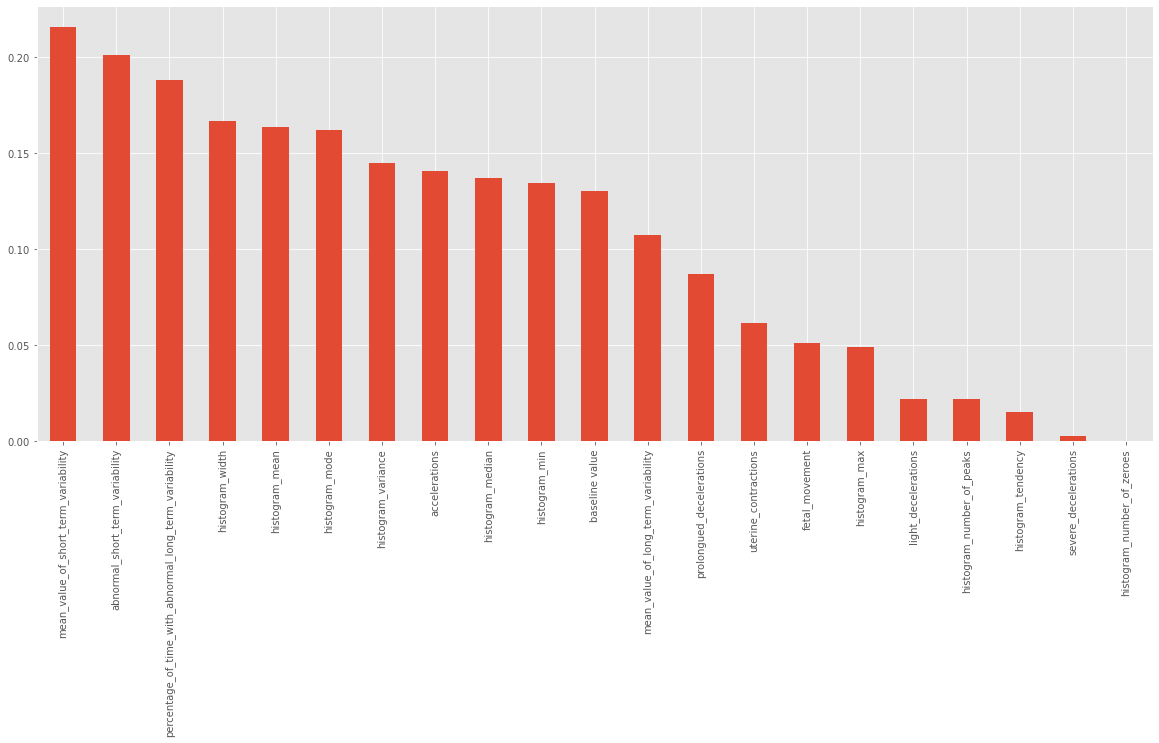

In [485]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [486]:
from sklearn.feature_selection import SelectKBest


In [488]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X, y)
X.columns[sel_five_cols.get_support()]


Index(['baseline value', 'accelerations', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance'],
      dtype='object')

In [489]:
X = X[['baseline value', 'accelerations', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance']]

In [490]:
df2 = df2[['baseline value', 'accelerations', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance']]